- SARIMA 모델은 일반적으로 SARIMA(p, d, q)(P, D, Q)(S)로 표현
    - p, d, q는 비계절성 AR, 차분, MA 구성요소의 차수
    - P, D, Q는 계절성 AR, 차분, MA 구성요소의 차수
    - S는 계절 주기를 나타냄
- SARIMA 모델의 특징
    - 계절성 고려 : SARIMA 모델은 계절성 요인을 포함하여 더 정확한 예측 제공
    - 유연성 : 다양한 시계열 데이터 패턴에 적용 가능
    - 장기 예측 : 장기적인 예측에 효과적

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

In [2]:
data = np.sin(np.linspace(0, 20, 120)) * 10 + np.random.normal(size = 120) * 2
ts = pd.Series(data)
train, test = ts[:80], ts[80:]

In [3]:
model = SARIMAX(train, order = (5, 2, 5), seasonal_order = (8, 1, 8, 6))
model_fitted = model.fit()

C:\Users\82102\PycharmProjects\iM_ML-DL\.venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\82102\PycharmProjects\iM_ML-DL\.venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [4]:
predictions = model_fitted.predict(start = len(train), end = len(train) + len(test) - 1, typ = 'levels')

C:\Users\82102\PycharmProjects\iM_ML-DL\.venv\lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


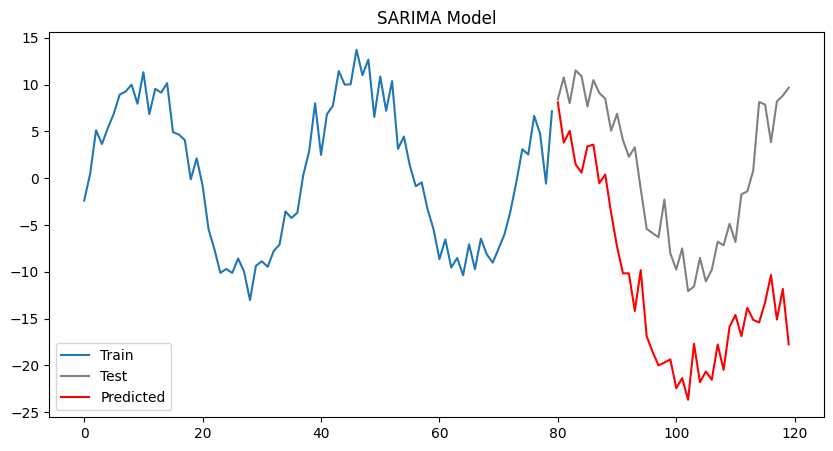

In [5]:
plt.figure(figsize = (10, 5))
plt.plot(train, label = "Train")
plt.plot(test.index, test, label = 'Test', color = 'gray')
plt.plot(test.index, predictions, label = 'Predicted', color = 'red')
plt.title("SARIMA Model")
plt.legend()
plt.show()

In [6]:
mse = mean_squared_error(test, predictions)
mse

184.8966823079351